# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

### Analysis
Economic activity refers to the inputs and outputs of an economy. For the specific city assigned, __Ann Arbor, Michigan, USA__, it can refer to the domestic consumption of goods and services (economic inflow) from other countries and production of goods (economic outflow) as well. 
 
On a local level, economic activity can be measured by examining the domestic trade growth in consumption and production, as well as examining the general employment of people by industries in Ann Arbor MI vis-a-vis the rest of the United States as a form of comparison to the kind of work that people in Ann Arbor MI engage in. 


### Loading All Data

In [1]:
# For reading and manipulation of data
import numpy as np
import pandas as pd

In [2]:
pro = pd.read_csv("Data/Local/Production.csv")
con = pd.read_csv("Data/Local/Consumption.csv")
pro.rename({'Millions Of Dollars': 'Production(Mn)', 'Millions Of Dollars Growth':'Pro_Growth(Mn)'},axis = 1,inplace = True)
con.rename({'Millions Of Dollars': 'Consumption(Mn)','Millions Of Dollars Growth':'Con_Growth(Mn)'}, axis = 1, inplace = True)
totalpro = pro.groupby("Year").agg({'Production(Mn)':np.nansum})
totalcon = con.groupby("Year").agg({'Consumption(Mn)':np.nansum})
totaldom = pd.merge(totalpro, totalcon, how = 'inner', left_index = True, right_index = True)
domestic = pd.merge(pro,con, how = 'inner', left_on = ['SCTG2','Year'], right_on = ['SCTG2','Year'])                         
totaldom

,Production(Mn),Consumption(Mn)
Year,,
2012,405342.163833,405475.964998
2013,422472.411510,408622.259868
2014,436879.013969,422424.017710
2015,447920.887503,432991.706771
2020,479917.425801,477392.057535
2025,507198.145322,519348.291044
2030,533366.566951,563069.260446
2035,559355.752463,608278.636771
2040,586502.325491,659521.747858


### Visualising Data

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import ipywidgets as widgets
import mplleaflet
import matplotlib.gridspec as gridspec
import mpl_toolkits.axes_grid1.inset_locator as mpl_i1
%matplotlib notebook
# I had big dreams ^ then I realise that i suck at matplotlib.

#### Local Level Analysis on Ann Arbor MI's Economic Activity

In [4]:
totaldom.head()

,Production(Mn),Consumption(Mn)
Year,,
2012,405342.163833,405475.964998
2013,422472.411510,408622.259868
2014,436879.013969,422424.017710
2015,447920.887503,432991.706771
2020,479917.425801,477392.057535


<IPython.core.display.Javascript object>


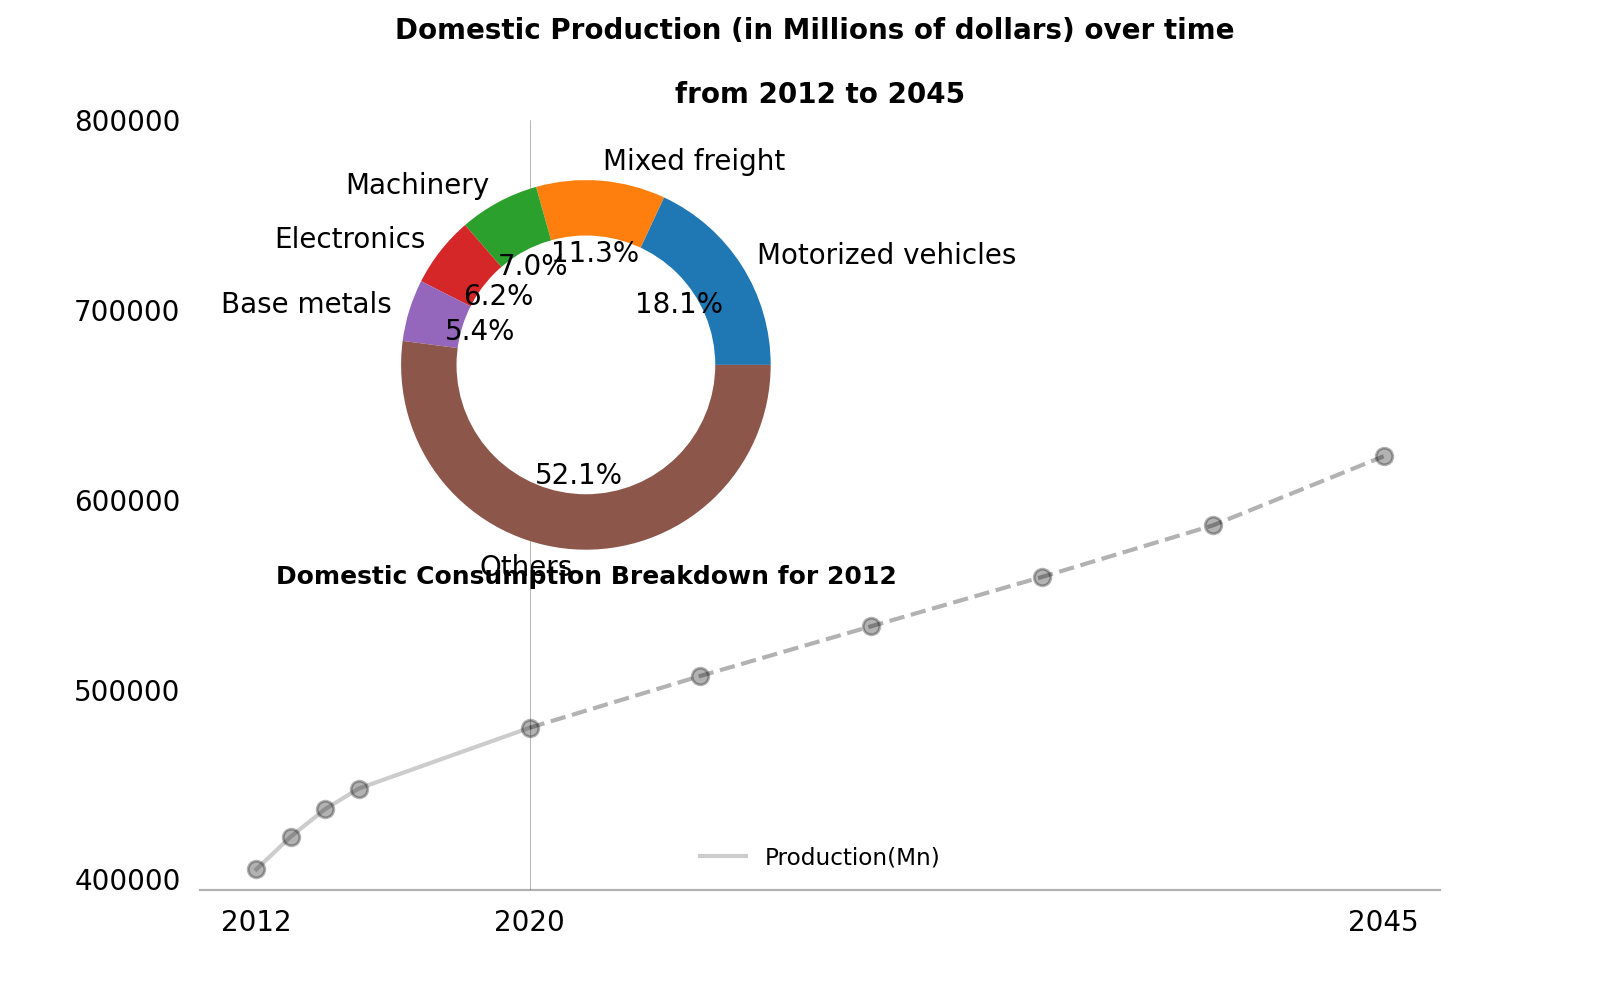

In [9]:
plt.figure(figsize = (8,5))
propast = plt.plot(totaldom.index.tolist()[:5], totaldom['Production(Mn)'].tolist()[:5], c = 'k', alpha = 0.2)
profuture = plt.plot(totaldom.index.tolist()[4:], totaldom['Production(Mn)'].tolist()[4:], "--",
                             c = 'k', alpha = 0.3)
# Use a scatter plot for data
datapro = plt.scatter(totaldom.index.tolist(), totaldom['Production(Mn)'].tolist(),
                              marker = 'o', c = 'k', alpha = 0.3, picker = 20)
    
#### ------------ Dejunkifying the plot----------
## Plot title 
plt.title('''Domestic Production (in Millions of dollars) over time \n
from 2012 to 2045''', fontsize = 10, fontweight = 'bold')
# Remove all spines and set some to visible
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['bottom'].set_alpha(0.3)
# Remove axis ticks
plt.tick_params(axis = "x", which = 'both', bottom = False, top = False)
plt.tick_params(axis = "y", which = 'both', left = False, right = False)
# Modify x axis ticks into 
plt.xticks([2012, 2020, 2045])
# Add Grid for x axis
plt.axvline(x=2020, linewidth = 0.2, c = 'k', alpha = 0.5)
# Modify y-axis labels 
plt.yticks(np.arange(400000,800001,100000))
# legend
plt.legend(loc = 8, labels = ['Production(Mn)'], 
          frameon = False, fontsize = 'small', framealpha = 0.9)
###--------------------
### Creating the functionality for the 2nd plot.
ax2 = mpl_i1.inset_axes(plt.gca(), width = '60%', height = '60%', loc = 2)
ax2.margins(x = 2.0)

## Creating a pick event
def viewdetails(event):
    ax2.cla()
    index = event.ind[0]
    year = totaldom.index[index]
    info = pro[pro['Year'] == year]
    info['share'] = info['Production(Mn)']/float(totaldom['Production(Mn)'][year]) * 100
    info.sort_values('share', ascending = False, inplace = True)
    piechartdata = info[['SCTG2','share']][:5]
    piechartdata = piechartdata.append({'SCTG2':'Others', 'share':100 - np.sum(piechartdata['share'])}, 
                                   ignore_index = True)
    info = info.reset_index().drop('index', axis = 1)
    pie= ax2.pie(piechartdata['share'].tolist(), labels = piechartdata['SCTG2'].tolist(), autopct='%.1f%%')
    ax2.set_title('\n\nDomestic Production Breakdown for {}'.format(year), y = -0.001,
                  fontsize = 9, fontweight = 'bold')
    #draw circle to reduce dataink ratio
    circle1 = plt.Circle((0,0),0.70,fc='white')
    ax2.add_patch(circle1)
# Tell mpl connect we want to pass a button-press event into onclick
plt.gcf().canvas.mpl_connect('pick_event', viewdetails)


### ------- Dejunkifying the 2nd axes ---------
for spine in ax2.spines.values():
    spine.set_visible(False) 
# Remove axis ticks
ax2.yaxis.set_visible(False)
ax2.xaxis.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


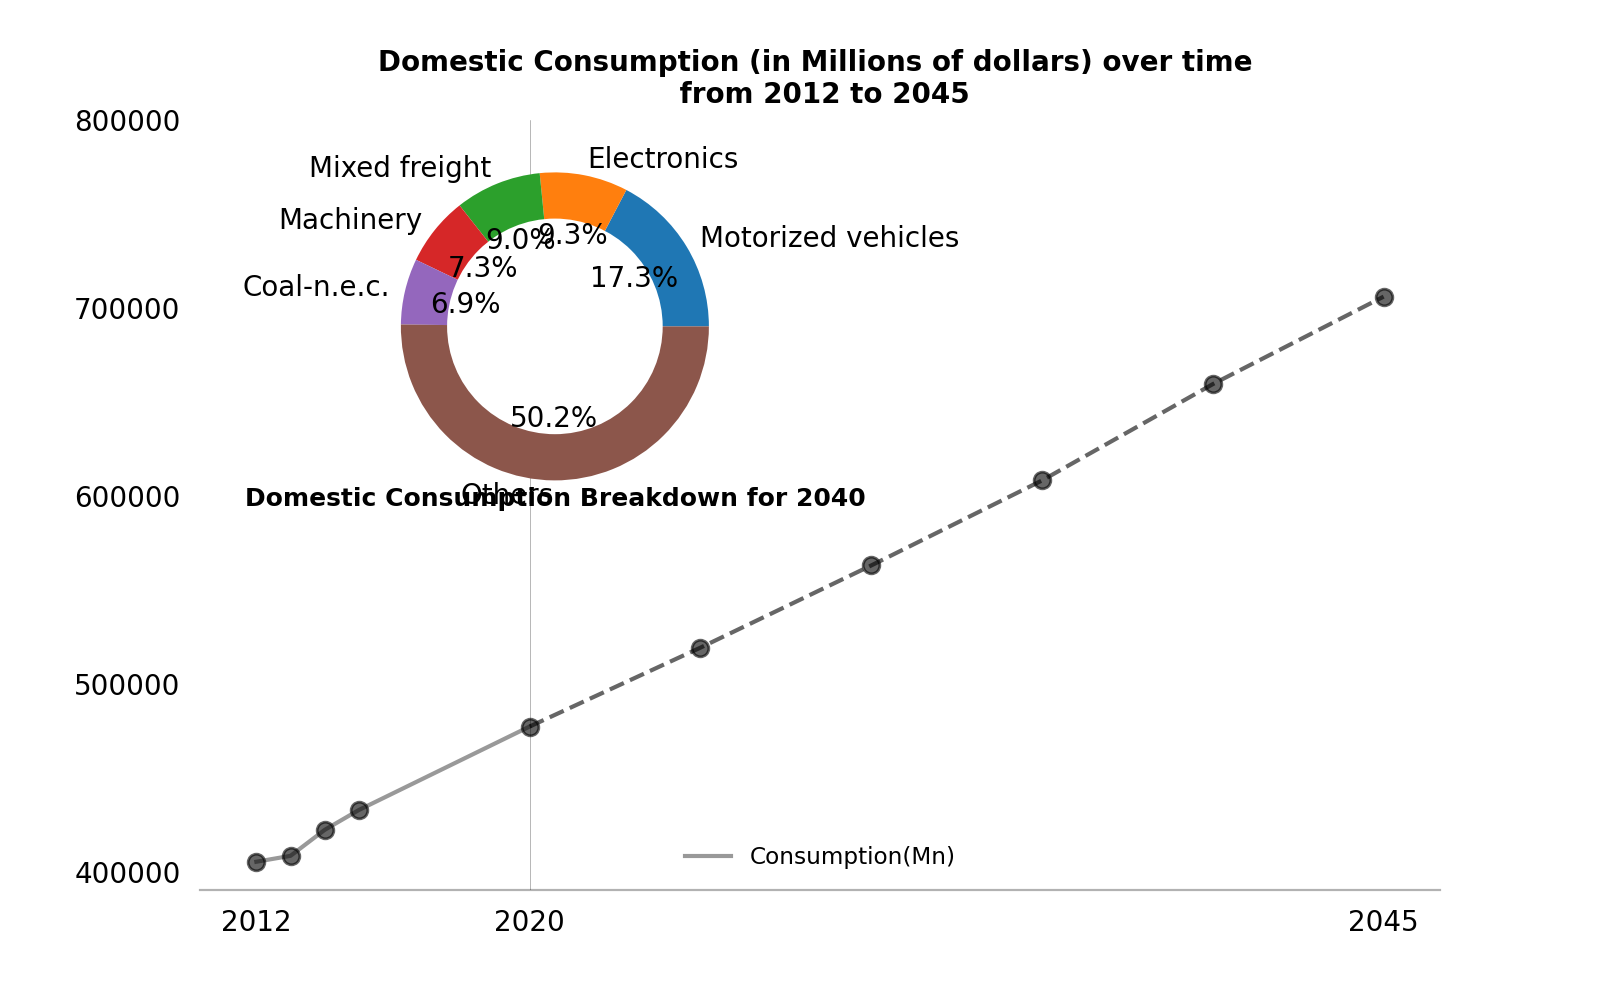

In [10]:
plt.figure(figsize = (8,5))
conpast = plt.plot(totaldom.index.tolist()[:5], totaldom['Consumption(Mn)'].tolist()[:5], c = 'k', alpha = 0.4)
confuture = plt.plot(totaldom.index.tolist()[4:], totaldom['Consumption(Mn)'].tolist()[4:],"--",
                     c = 'k', alpha = 0.6)
# Use a scatter plot for data
datacon = plt.scatter(totaldom.index.tolist(), totaldom['Consumption(Mn)'].tolist(), 
                      marker = 'o', c = 'k', alpha = 0.6, picker = 20)
    
#### ------------ Dejunkifying the plot----------
## Plot title 
plt.title('''Domestic Consumption (in Millions of dollars) over time \n from 2012 to 2045''', fontweight = 'bold',
         fontsize = 10)
# Remove all spines and set some to visible
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['bottom'].set_alpha(0.3)
# Remove axis ticks
plt.tick_params(axis = "x", which = 'both', bottom = False, top = False)
plt.tick_params(axis = "y", which = 'both', left = False, right = False)
# Modify x axis ticks into 
plt.xticks([2012, 2020, 2045])
# Add Grid for x axis
plt.axvline(x=2020, linewidth = 0.2, c = 'k', alpha = 0.5)
# Modify y-axis labels 
plt.yticks(np.arange(400000,800001,100000))
# legend
plt.legend(loc = 8, labels = ['Consumption(Mn)'], 
          frameon = False, fontsize = 'small', framealpha = 0.9)
###--------------------
### Creating the functionality for the 2nd plot.
ax2 = mpl_i1.inset_axes(plt.gca(), width = '55%', height = '50%', loc = 2)

## Creating a pick event
def viewdetailscon(event):
    ax2.cla()
    index = event.ind[0]
    year = totaldom.index[index]
    info = con[con['Year'] == year]
    info['share'] = info['Consumption(Mn)']/float(totaldom['Consumption(Mn)'][year]) * 100
    info.sort_values('share', ascending = False, inplace = True)
    piechartdata = info[['SCTG2','share']][:5]
    piechartdata = piechartdata.append({'SCTG2':'Others', 'share':100 - np.sum(piechartdata['share'])}, 
                                   ignore_index = True)
    info = info.reset_index().drop('index', axis = 1)
    ax2.pie(piechartdata['share'].tolist(), labels = piechartdata['SCTG2'].tolist(), autopct='%.1f%%')
    ax2.set_title('\n\nDomestic Consumption Breakdown for {}'.format(year), y = -0.01, 
                  fontsize = 9, fontweight = 'bold')
    #draw circle to reduce dataink ratio
    circle1 = plt.Circle((0,0),0.70,fc='white')
    ax2.add_patch(circle1)
# Tell mpl connect we want to pass a button-press event into onclick
plt.gcf().canvas.mpl_connect('pick_event', viewdetailscon)


### ------- Dejunkifying the 2nd axes ---------
for spine in ax2.spines.values():
    spine.set_visible(False) 
# Remove axis ticks
ax2.yaxis.set_visible(False)
ax2.xaxis.set_visible(False)
plt.show()

### Analysis (aka smoke)
Domestic economic activity is projected to increase in Ann Arbor, Michigan. A substantial proportion of the economy's production and consumption is on Motorised Vehicles (P: 30.2%, C:19.0% in 2015), which is projected to decrease in the future (P:22.6%, C: 16.8% in 2045), but would still take the greatest domestic economic share. 

The Domestic Production (DP) share for Machinery is projected to overtake that of Mixed Frieght by 2025, and by 2035 the DP share for Pharmaceuticals would overtake the DP share of the extraction of base metals.

The Domestic Consumption (DC) share for Electronics is projected to overtake that of Mixed Frieight by 2040, and the country's consumption of Coal, Machinery, Mixed Freight and Electronics will take up an increasing amount of DC share, as the DC share for Motorised vehicles decreases.


## References
- Data USA: https://datausa.io/profile/geo/ann-arbor-mi?compare=united-states#economy